In [1]:
import random
import sys, os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

sys.path.append(os.path.abspath("./"))
from utils import *

## Setup

In [2]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [15, 4]

classes_path  = '../model_data/coco_classes.txt'
detection_file_path = '../data/output/mhca/detection_output.txt'
classes  = get_classes(classes_path)
id2class = {str(i): classes[i] for i in range(len(classes))}
img2bbs  = get_predictions(detection_file_path)
img2bb   = explode_dict(img2bbs)

non_classified_image_paths = [path for path, bbs in img2bbs.items() if len(bbs) == 0]

## Some stats

In [3]:
prediction_counts_series = pd.Series([elem[1].prediction for elem in img2bb])
counts_series_minority, counts_series_majority = get_value_counts(prediction_counts_series, id2class)

print(f'NUMBER OF IMAGES:          {len(img2bbs)}')
print(f'NUMBER OF BOUNDING BOXES:  {len(img2bb)}')

print(f'NUMBER OF NON-CLASSIFIED:  {len(non_classified_image_paths)}')

NUMBER OF IMAGES:          16481
NUMBER OF BOUNDING BOXES:  20203
NUMBER OF NON-CLASSIFIED:  1841


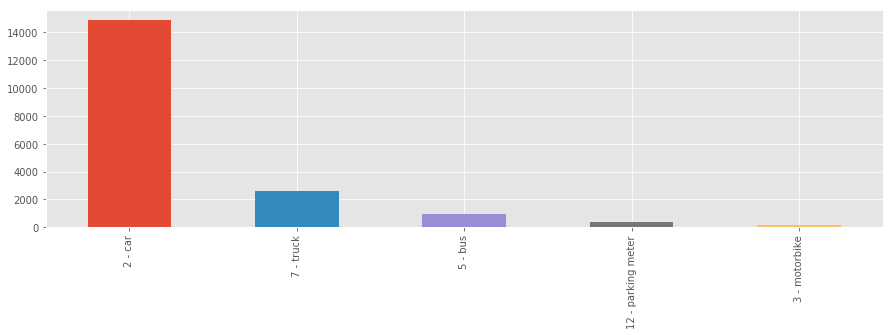

In [4]:
counts_series_majority.sort_values(ascending=False).plot.bar();

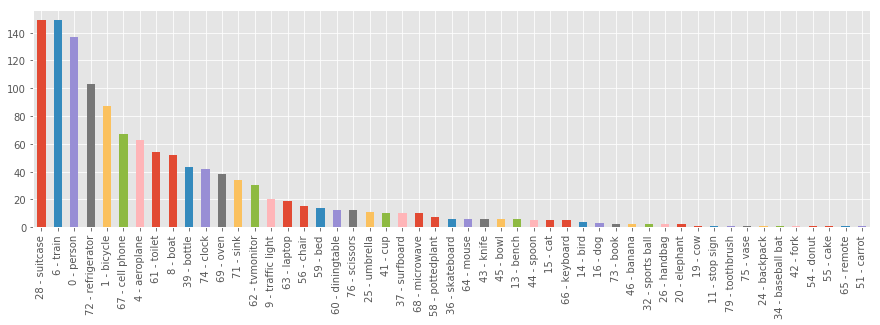

In [5]:
counts_series_minority.sort_values(ascending=False).plot.bar();

## Example of predicted

boat
['../data/input/mhca-cropped/DV54JXD/DV54JXD_0.jpg']


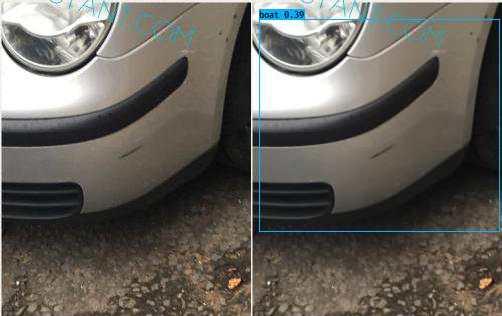

In [6]:
class_id = '8'
print(id2class[class_id])
get_sample_of(class_id, img2bb)[0]

## Example of non classified image

['../data/input/mhca-cropped/277A42A6-1AE9-4532-B7BA-68C15B559B83/277A42A6-1AE9-4532-B7BA-68C15B559B83_0.jpg']


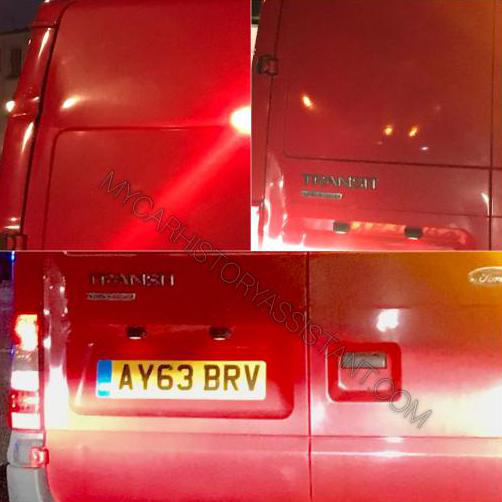

In [7]:
get_sample_from_list(non_classified_image_paths)[0]